In [13]:
#import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
#load training labels
ytrain = pd.read_csv('Data/train_labels.csv', delimiter=',', header=None, names=["label"])

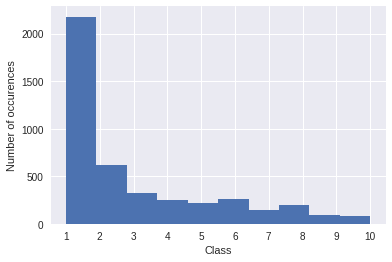

In [15]:
#plot histogram of training labels
plt.hist(ytrain.values,bins=10,range=(1,10))
plt.xticks(range(1,11))
plt.xlabel('Class')
plt.ylabel('Number of occurences')
plt.show()

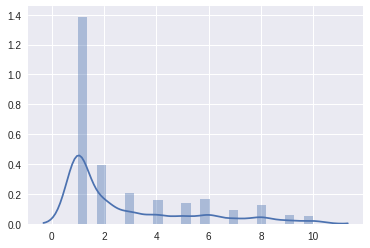

In [16]:
sns.distplot(ytrain.values)

In [17]:
#read training data to dataframe
xtrain=pd.read_csv('Data/train_data.csv',header=None)

In [18]:
#print first five rows
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,37.387,-17.283,49.64000,11.4170,1.8942,-2.0002,1.3012,1.1586,-6.5276,-1.9027,...,7.5717,6.8944,5.7944,3.1028,2.8110,2.7815,1.7431,1.7055,1.0378,0.049366
1,49.426,43.378,8.73340,-5.5765,-2.6802,-27.7490,27.8580,2.5126,14.5890,7.5450,...,9.9208,10.3140,11.0900,10.1500,7.1359,5.9452,4.4554,3.9025,1.4580,0.001066
2,42.075,-84.998,0.86254,7.6005,-1.6374,6.8026,-1.5204,-6.8992,1.2729,-6.5295,...,9.3463,10.3520,7.1945,6.3734,4.5575,3.8467,3.9124,3.5032,1.2211,0.001066
3,52.261,45.071,22.93400,-2.1134,-26.8250,-23.0880,-3.2843,-3.4469,-4.1212,2.8183,...,13.8150,11.5750,13.5710,10.1950,8.5917,7.1245,5.8149,5.1486,2.0151,0.001066
4,44.731,67.540,33.55800,-1.9516,-14.6890,-22.2170,-9.0476,1.0945,16.1200,4.6033,...,8.9629,10.8800,10.1680,7.7896,7.9014,4.6252,3.2544,2.1685,1.0518,0.001066


In [19]:
#get info of the dataset (not very intersting in our case)
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Columns: 264 entries, 0 to 263
dtypes: float64(264)
memory usage: 8.8 MB


count    4363.000000
mean        0.999331
std         0.015427
min         0.396000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: 84, dtype: float64


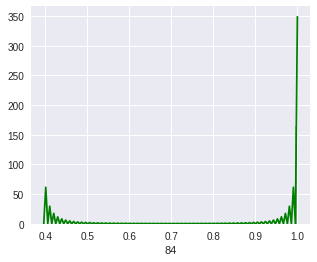

In [51]:
#get statistics and plot distribution of one feature
feature=xtrain[84] #can change this to different feature
print(feature.describe())
plt.figure(figsize=(5, 4))
sns.distplot(feature, color='g', bins=100, hist_kws={'alpha': 0.4})

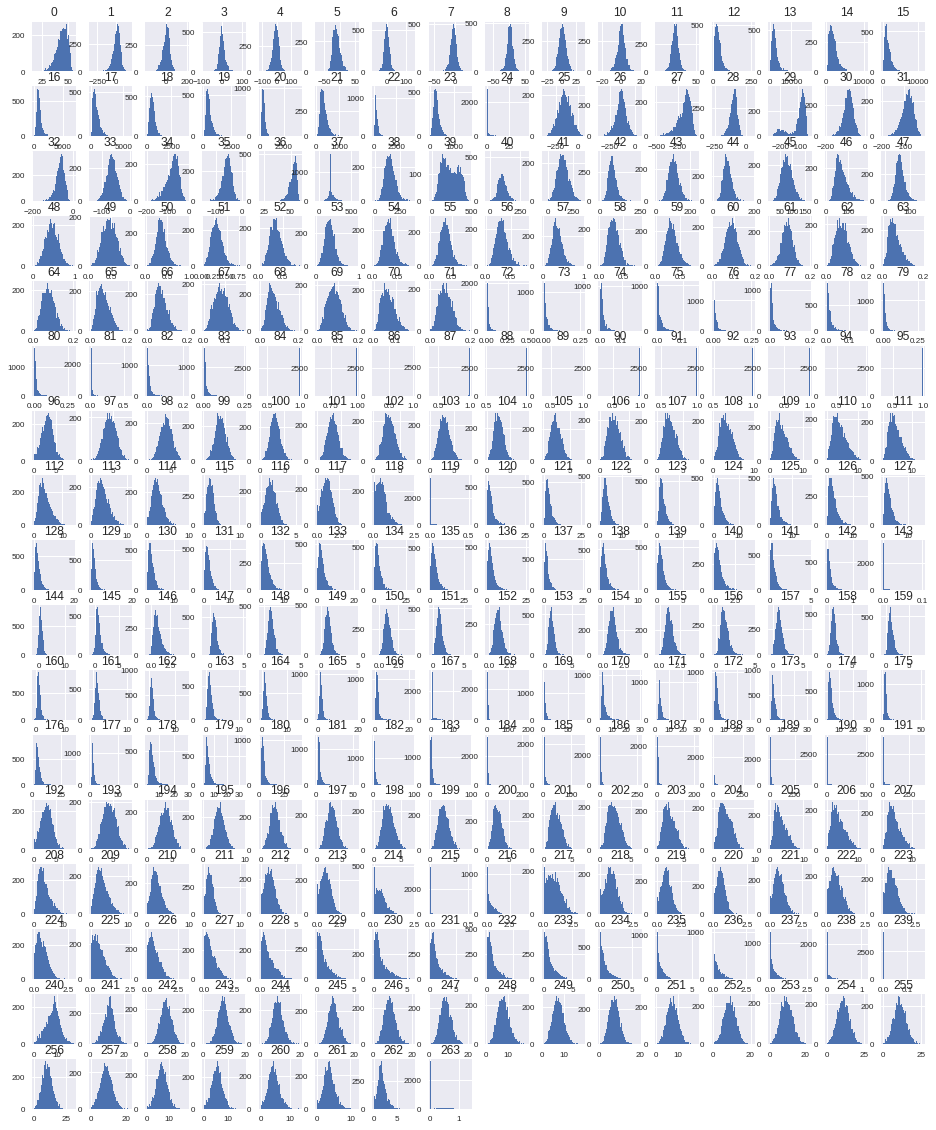

In [21]:
#plot the histograms of all features
#loads of plots, but helps to give overview of the kind of data distributions
xtrain.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [22]:
#convert ytrain to pandas dataframe
ytrain=pd.read_csv('Data/train_labels.csv',header=None,names=['label'])

In [23]:
#join training data and labels
both=xtrain.join(ytrain)

In [24]:
#calculate the correlations of all features to the labels
both_corr=both.corr()['label'][:-1] #[:-1] cause last entry is correlation of label to itself

In [41]:
#f features with strongest correlation. Mainly seem to be at the later features and they all have a negative correlation. 
#from histograms we can see that these features don't really have the same shape, interesting!
#they have to do something with the rythm pattern but not sure what
f=15
highest_corr=both_corr.reindex(both_corr.abs().sort_values(ascending=False).index)[:f]
print(highest_corr)
val_high_cor=both[highest_corr.index].join(both['label'])
#other method: both_corr[abs(both_corr)>0.25].sort_values()

5      0.381920
231   -0.314808
229   -0.314466
230   -0.313176
232   -0.312382
233   -0.311485
227   -0.311110
234   -0.309562
228   -0.304431
226   -0.296654
235   -0.294369
225   -0.293417
217   -0.291001
224   -0.285142
223   -0.275423
Name: label, dtype: float64


In [47]:
both_corr.abs().min()

0.00052304799514628429

In [45]:
both_corr.abs().mean()

0.1246889527175576

In [39]:
from pandas.tools.plotting import scatter_matrix

/home/tinka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55decf5a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f55ddc92f28>]], dtype=object)

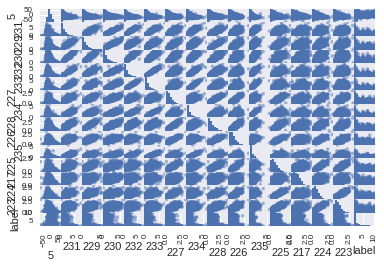

In [40]:
scatter_matrix(val_high_cor)

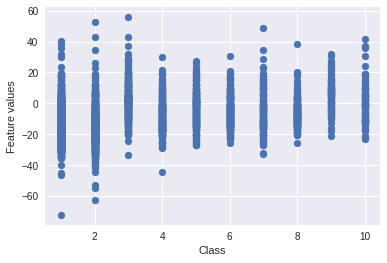

In [53]:
plt.scatter(val_high_cor['label'],val_high_cor[5])
plt.xlabel('Class')
plt.ylabel("Feature values")